In [1]:
#Import libraries:
import pandas as pd
import numpy as np
import os
os.chdir("C:\\Users\\bunde\\OneDrive\\Desktop\\data scince with python")
data = pd.read_json('News_Category_Dataset.json',lines=True)
data.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [2]:
data['text'] = data.headline + " " + data.short_description
data['text']

0         There Were 2 Mass Shootings In Texas Last Week...
1         Will Smith Joins Diplo And Nicky Jam For The 2...
2         Hugh Grant Marries For The First Time At Age 5...
3         Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4         Julianna Margulies Uses Donald Trump Poop Bags...
5         Morgan Freeman 'Devastated' That Sexual Harass...
6         Donald Trump Is Lovin' New McDonald's Jingle I...
7         What To Watch On Amazon Prime That’s New This ...
8         Mike Myers Reveals He'd 'Like To' Do A Fourth ...
9         What To Watch On Hulu That’s New This Week You...
10        Justin Timberlake Visits Texas School Shooting...
11        South Korean President Meets North Korea's Kim...
12        With Its Way Of Life At Risk, This Remote Oyst...
13        Trump's Crackdown On Immigrant Parents Puts Mo...
14        'Trump's Son Should Be Concerned': FBI Obtaine...
15        Edward Snowden: There's No One Trump Loves Mor...
16        Booyah: Obama Photographer Hil

In [3]:
    # Convert to lowercases
    data['text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    data['text'] .head()

0    there were 2 mass shootings in texas last week...
1    will smith joins diplo and nicky jam for the 2...
2    hugh grant marries for the first time at age 5...
3    jim carrey blasts 'castrato' adam schiff and d...
4    julianna margulies uses donald trump poop bags...
Name: text, dtype: object

In [4]:
text=str(data['text'])
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
print(tokens[:100])

['0', 'there', 'were', '2', 'mass', 'shootings', 'in', 'texas', 'last', 'week', '...', '1', 'will', 'smith', 'joins', 'diplo', 'and', 'nicky', 'jam', 'for', 'the', '2', '...', '2', 'hugh', 'grant', 'marries', 'for', 'the', 'first', 'time', 'at', 'age', '5', '...', '3', 'jim', 'carrey', 'blasts', "'castrato", "'", 'adam', 'schiff', 'and', 'd', '...', '4', 'julianna', 'margulies', 'uses', 'donald', 'trump', 'poop', 'bags', '...', '5', 'morgan', 'freeman', "'devastated", "'", 'that', 'sexual', 'harass', '...', '6', 'donald', 'trump', 'is', 'lovin', "'", 'new', 'mcdonald', "'s", 'jingle', 'i', '...', '7', 'what', 'to', 'watch', 'on', 'amazon', 'prime', 'that', '’', 's', 'new', 'this', '...', '8', 'mike', 'myers', 'reveals', 'he', "'d", "'like", 'to', "'", 'do', 'a']


In [5]:
# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words[:100]) 


['there', 'were', 'mass', 'shootings', 'in', 'texas', 'last', 'week', 'will', 'smith', 'joins', 'diplo', 'and', 'nicky', 'jam', 'for', 'the', 'hugh', 'grant', 'marries', 'for', 'the', 'first', 'time', 'at', 'age', 'jim', 'carrey', 'blasts', 'adam', 'schiff', 'and', 'd', 'julianna', 'margulies', 'uses', 'donald', 'trump', 'poop', 'bags', 'morgan', 'freeman', 'that', 'sexual', 'harass', 'donald', 'trump', 'is', 'lovin', 'new', 'mcdonald', 'jingle', 'i', 'what', 'to', 'watch', 'on', 'amazon', 'prime', 'that', 's', 'new', 'this', 'mike', 'myers', 'reveals', 'he', 'to', 'do', 'a', 'fourth', 'what', 'to', 'watch', 'on', 'hulu', 'that', 's', 'new', 'this', 'week', 'you', 'justin', 'timberlake', 'visits', 'texas', 'school', 'shooting', 'south', 'korean', 'president', 'meets', 'north', 'korea', 'kim', 'with', 'its', 'way', 'of', 'life']


In [6]:
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['mass', 'shootings', 'texas', 'last', 'week', 'smith', 'joins', 'diplo', 'nicky', 'jam', 'hugh', 'grant', 'marries', 'first', 'time', 'age', 'jim', 'carrey', 'blasts', 'adam', 'schiff', 'julianna', 'margulies', 'uses', 'donald', 'trump', 'poop', 'bags', 'morgan', 'freeman', 'sexual', 'harass', 'donald', 'trump', 'lovin', 'new', 'mcdonald', 'jingle', 'watch', 'amazon', 'prime', 'new', 'mike', 'myers', 'reveals', 'fourth', 'watch', 'hulu', 'new', 'week', 'justin', 'timberlake', 'visits', 'texas', 'school', 'shooting', 'south', 'korean', 'president', 'meets', 'north', 'korea', 'kim', 'way', 'life', 'risk', 'remote', 'oyst', 'trump', 'crackdown', 'immigrant', 'parents', 'puts', 'mo', 'son', 'concerned', 'fbi', 'obtaine', 'edward', 'snowden', 'one', 'trump', 'loves', 'mor', 'booyah', 'obama', 'photographer', 'hilariously', 'trolls', 'ireland', 'votes', 'repeal', 'abortion', 'amendment', 'ryan', 'zinke', 'looks', 'reel', 'back', 'critics']


In [7]:

# stemming of words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in words]
print(stemmed[:100])

['mass', 'shoot', 'texa', 'last', 'week', 'smith', 'join', 'diplo', 'nicki', 'jam', 'hugh', 'grant', 'marri', 'first', 'time', 'age', 'jim', 'carrey', 'blast', 'adam', 'schiff', 'julianna', 'marguli', 'use', 'donald', 'trump', 'poop', 'bag', 'morgan', 'freeman', 'sexual', 'harass', 'donald', 'trump', 'lovin', 'new', 'mcdonald', 'jingl', 'watch', 'amazon', 'prime', 'new', 'mike', 'myer', 'reveal', 'fourth', 'watch', 'hulu', 'new', 'week', 'justin', 'timberlak', 'visit', 'texa', 'school', 'shoot', 'south', 'korean', 'presid', 'meet', 'north', 'korea', 'kim', 'way', 'life', 'risk', 'remot', 'oyst', 'trump', 'crackdown', 'immigr', 'parent', 'put', 'mo', 'son', 'concern', 'fbi', 'obtain', 'edward', 'snowden', 'one', 'trump', 'love', 'mor', 'booyah', 'obama', 'photograph', 'hilari', 'troll', 'ireland', 'vote', 'repeal', 'abort', 'amend', 'ryan', 'zink', 'look', 'reel', 'back', 'critic']


In [8]:
import nltk
from nltk.util import ngrams
from collections import Counter

def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]
def gramfreq(text,n):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])



In [9]:
unigram=gramfreq(stemmed,1)
unigram.index.names = ['1-Gram']
unigram


,frequency
1-Gram,
trump,6
obama,4
presid,4
one,3
new,3
first,3
north,2
korea,2
way,2


In [10]:
bigram=gramfreq(stemmed,2)
bigram.index.names = ['2-Gram']
bigram


,frequency
2-Gram,
north korea,2
donald trump,2
presid obama,2
ireland vote,2
gabo friend,1
support mobil,1
w support,1
left w,1
die left,1


In [11]:
writer = pd.ExcelWriter('Ngrams_final.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
unigram.to_excel(writer, sheet_name='Unigram')
bigram.to_excel(writer, sheet_name='Bigram')
writer.save()
writer

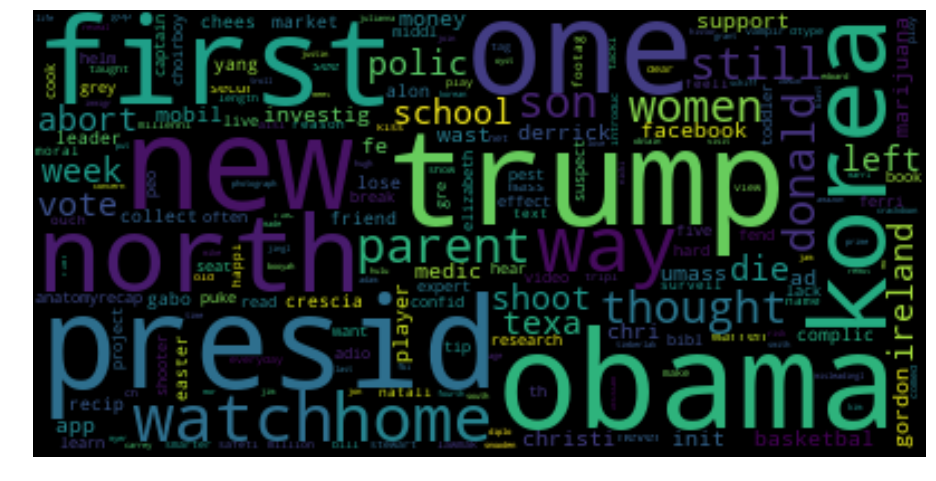

In [12]:
##wordcloud
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from nltk.corpus import inaugural
wordcloud = WordCloud(max_font_size=60).generate(' '.join(unigram.index))
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
#TF IDF
nltk.download('vader_lexicon')
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
data['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in data['text']]       
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(data['text_lem'].str.upper())
print(X)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bunde\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\bunde\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


  (0, 5533)	0.335287233773552
  (0, 8154)	0.3780746868213978
  (0, 9044)	0.30489176076511587
  (0, 9771)	0.24247510313870202
  (0, 9364)	0.2963033704406439
  (0, 5159)	0.2992905173629183
  (0, 4379)	0.3322328435427426
  (0, 4965)	0.2892496857970677
  (0, 1506)	0.2682642810688014
  (0, 4895)	0.19886979367557447
  (0, 2249)	0.22235736396955652
  (0, 301)	0.2460011784592517
  (1, 8332)	0.31313663534188185
  (1, 4840)	0.33169263529563014
  (1, 4770)	0.38525716675868743
  (1, 9905)	0.19090765758450273
  (1, 2155)	0.315194139145316
  (1, 6185)	0.2831028201035071
  (1, 8393)	0.5885706230601195
  (1, 2031)	0.2848625889838462
  (2, 4350)	0.31083950918658443
  (2, 3917)	0.30736258815342
  (2, 5514)	0.3351202031780343
  (2, 9123)	0.14858618031692641
  (2, 184)	0.2178333808165658
  :	:
  (124985, 4155)	0.2662038729707025
  (124985, 9527)	0.31269039881547184
  (124985, 1964)	0.641828357719533
  (124985, 2427)	0.36685789584458683
  (124986, 4271)	0.3519480151090602
  (124986, 6725)	0.329610559310148

In [14]:
#sentiment analysis
sid = SentimentIntensityAnalyzer()
data['sentiment_compound_polarity']=data.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
data['sentiment_neutral']=data.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
data['sentiment_negative']=data.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
data['sentiment_pos']=data.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
data['sentiment_type']=''
data.loc[data.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
data.loc[data.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
data.loc[data.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

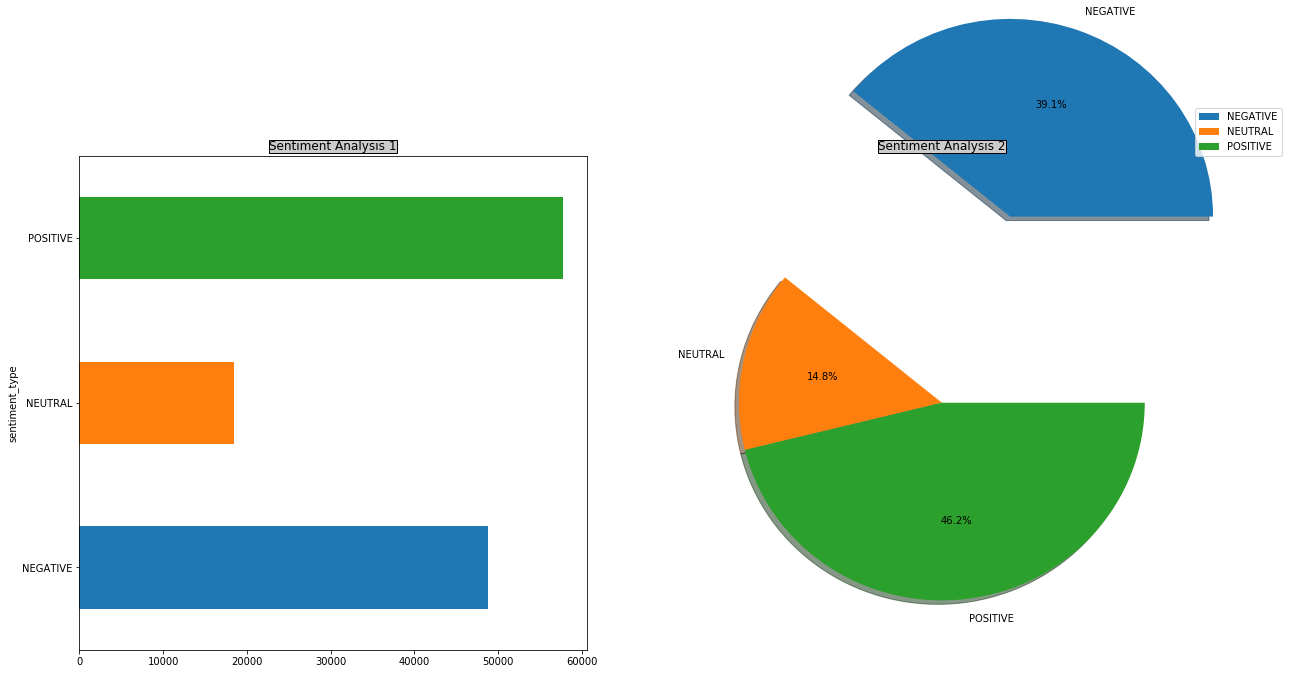

In [15]:
data_sentiment = data.groupby(['sentiment_type'])['sentiment_neutral'].count()
data_sentiment.rename("",inplace=True)
explode = (1, 0, 0)
plt.subplot(221)
data_sentiment.transpose().plot(kind='barh',figsize=(20, 20))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
data_sentiment.plot(kind='pie',figsize=(20, 20),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

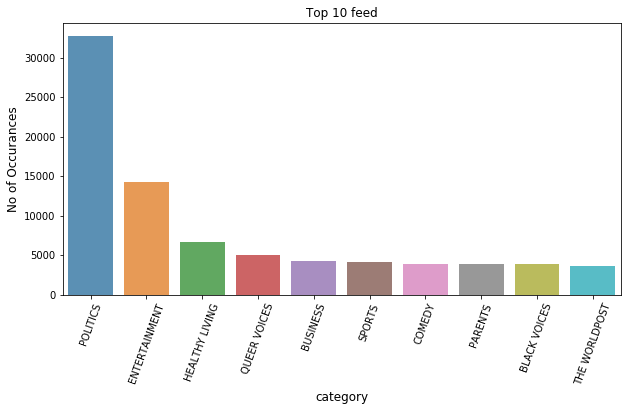

In [18]:
#### no. of occurences of different category in dataset
import seaborn as sns
import matplotlib.pyplot as plt
feed_count = data['category'].value_counts()
feed_count = feed_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(feed_count.index , feed_count.values, alpha = 0.8)
plt.title("Top 10 feed")
plt.ylabel('No of Occurances', fontsize = 12)
plt.xlabel('category', fontsize = 12)
plt.xticks(rotation=70)
plt.show()

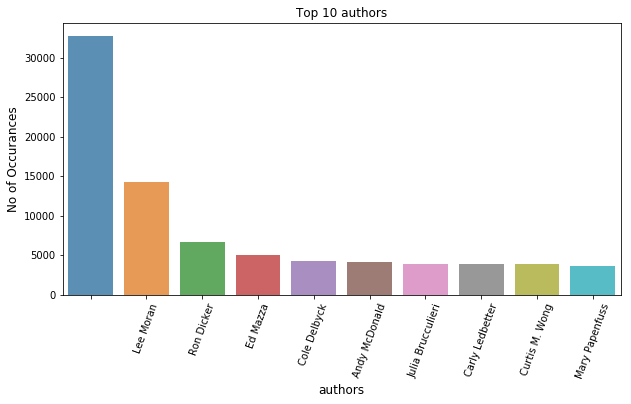

In [21]:
#### no. of occurences of different category in dataset
import seaborn as sns
import matplotlib.pyplot as plt
auth_count = data['authors'].value_counts()
auth_count = auth_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(auth_count.index , feed_count.values, alpha = 0.8)
plt.title("Top 10 authors")
plt.ylabel('No of Occurances', fontsize = 12)
plt.xlabel('authors', fontsize = 12)
plt.xticks(rotation=70)
plt.show()